In [40]:
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.image import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [3]:
# Visualizing Single Audio
random_file_path = "./genres_original-20250610T204939Z-1-001/genres_original/blues/blues.00000.wav"

C:\Users\rizzh\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\rizzh\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\rizzh\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


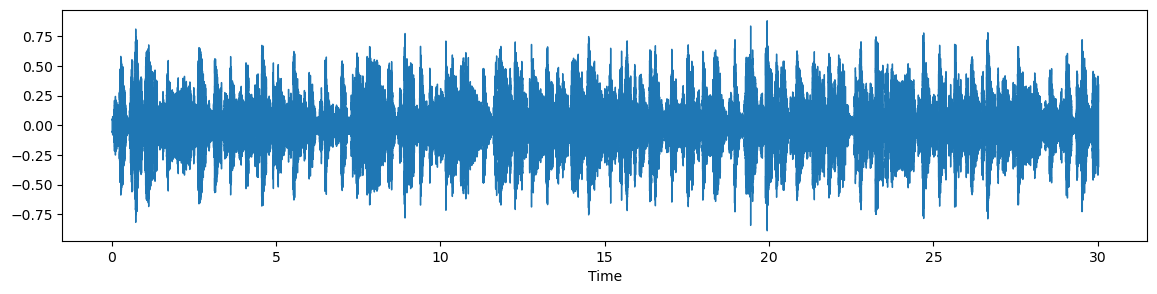

In [4]:
y,sr = librosa.load(random_file_path,sr=None)
plt.figure(figsize=(14,3))
librosa.display.waveshow(y,sr=sr)

In [5]:
y.shape

(661794,)

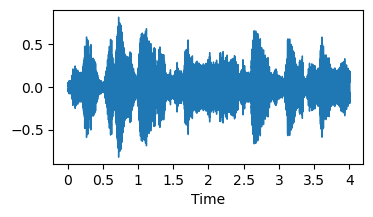

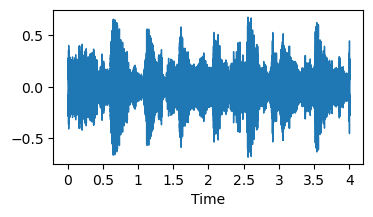

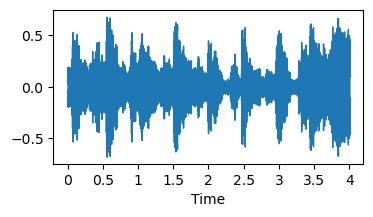

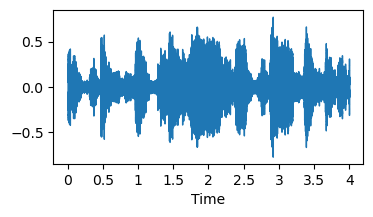

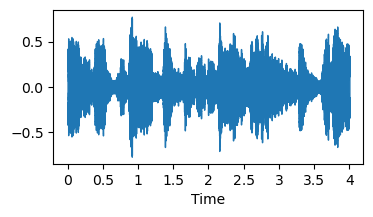

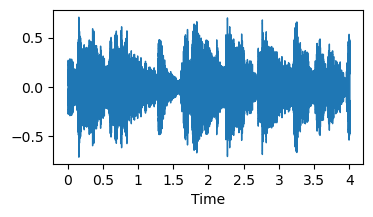

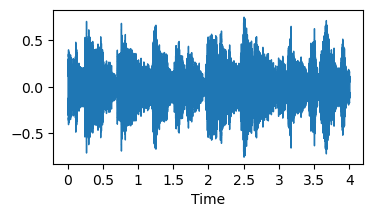

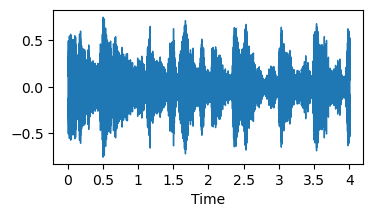

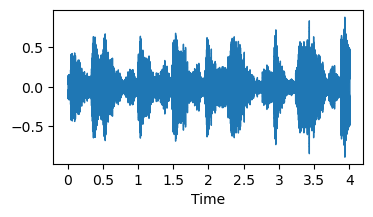

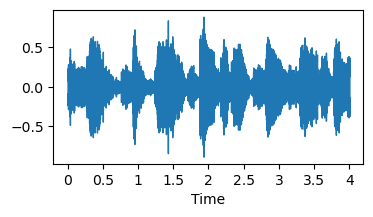

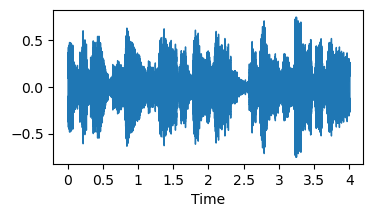

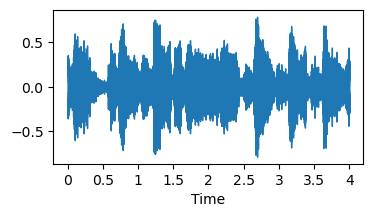

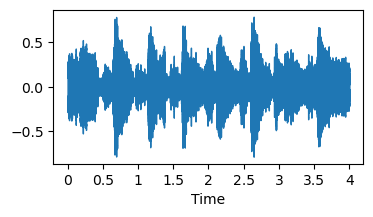

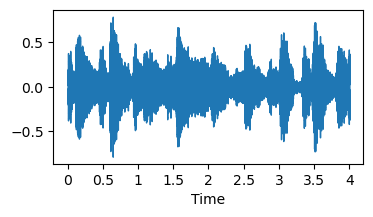

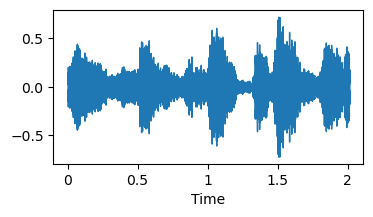

In [6]:
audio_path = "./genres_original-20250610T204939Z-1-001/genres_original/blues/blues.00000.wav"
y,sr = librosa.load(audio_path,sr=None)
chunk_duration = 4 
overlap_duration = 2 
chunk_samples = chunk_duration*sr
overlap_samples = overlap_duration*sr
num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples))) + 1
for i in range(num_chunks):
    start = i*(chunk_samples-overlap_samples)
    end = start + chunk_samples
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()
    


In [7]:
def melspectrogramplotter(y,sr):
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()
    

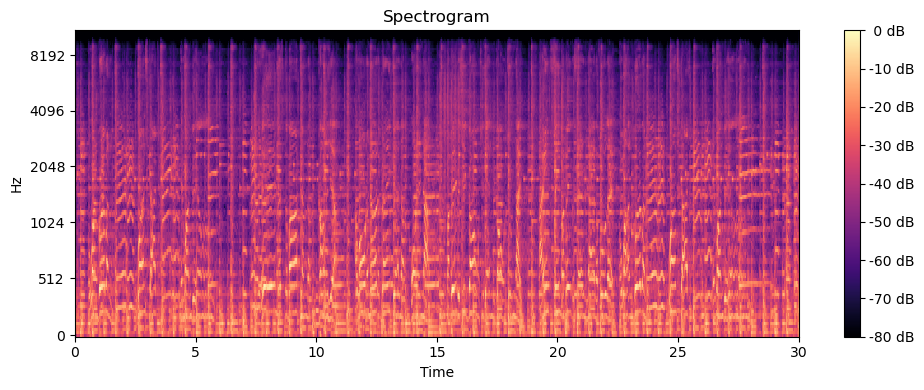

In [8]:
random_file_path = "./genres_original-20250610T204939Z-1-001/genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_path,sr=None)
melspectrogramplotter(y,sr)

In [9]:
def melspectrogramchunksplotter(y,sr):
    chunk_duration = 4 
    overlap_duration = 2 
    chunk_samples = chunk_duration*sr
    overlap_samples = overlap_duration*sr
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples))) + 1
    for i in range(num_chunks):
        start = i*(chunk_samples-overlap_samples)
        end = start + chunk_samples
        chunk = y[start:end]
        melspectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        melspectrogram_db = librosa.power_to_db(melspectrogram,ref=np.max)
        print(melspectrogram.shape)
        plt.figure(figsize=(10,4))
        librosa.display.specshow(melspectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

(128, 173)


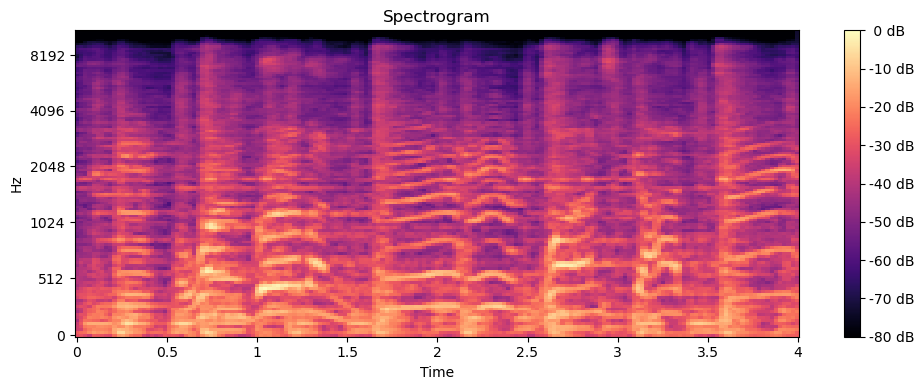

(128, 173)


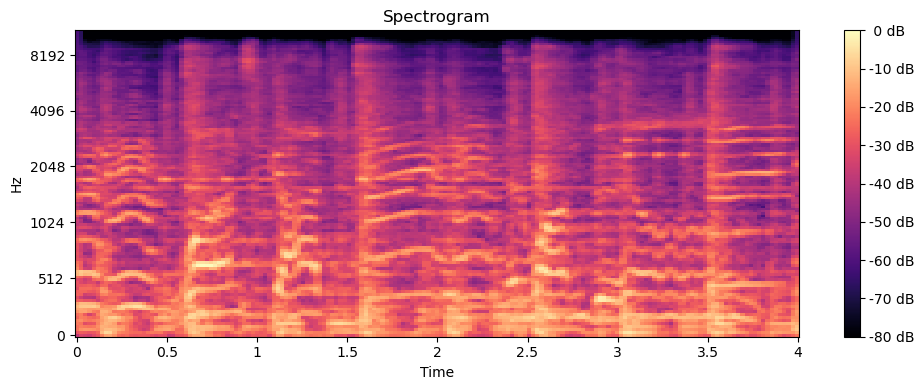

(128, 173)


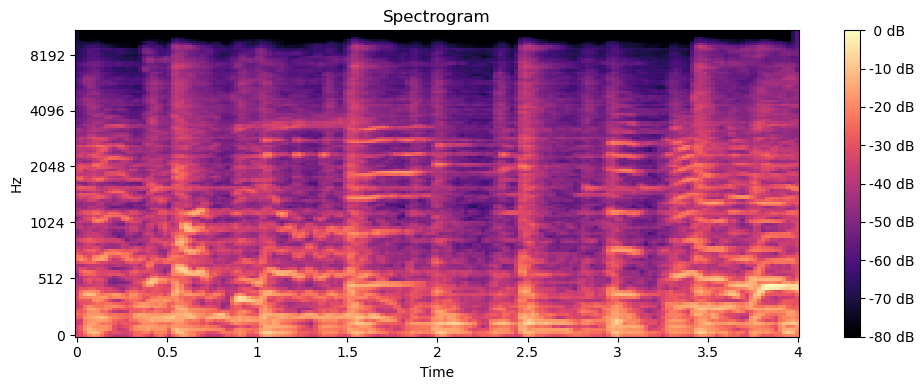

(128, 173)


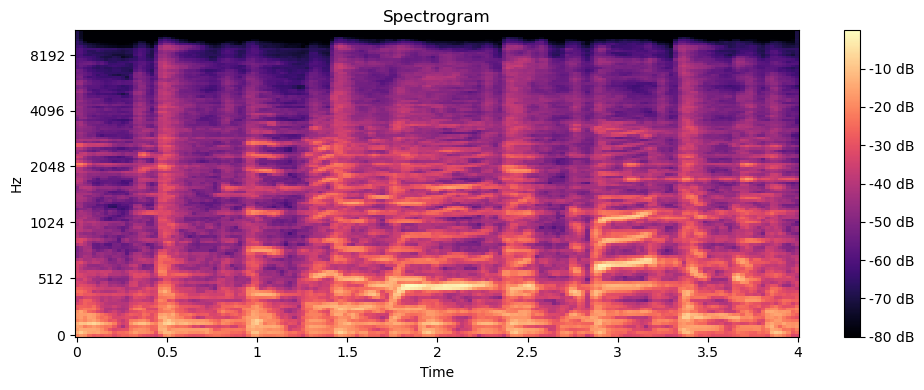

(128, 173)


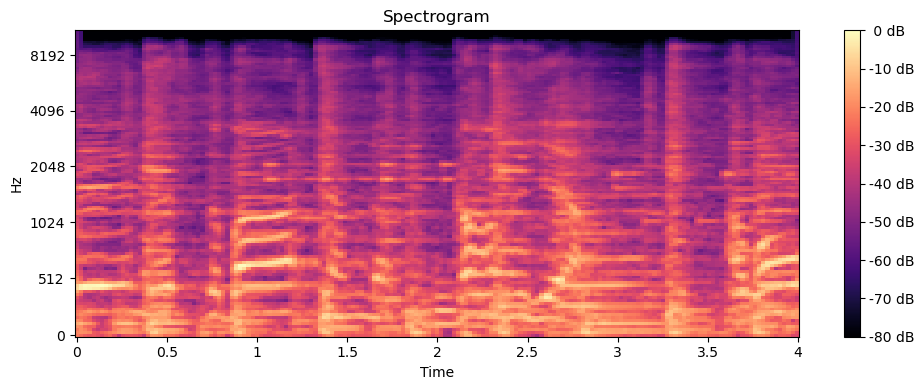

(128, 173)


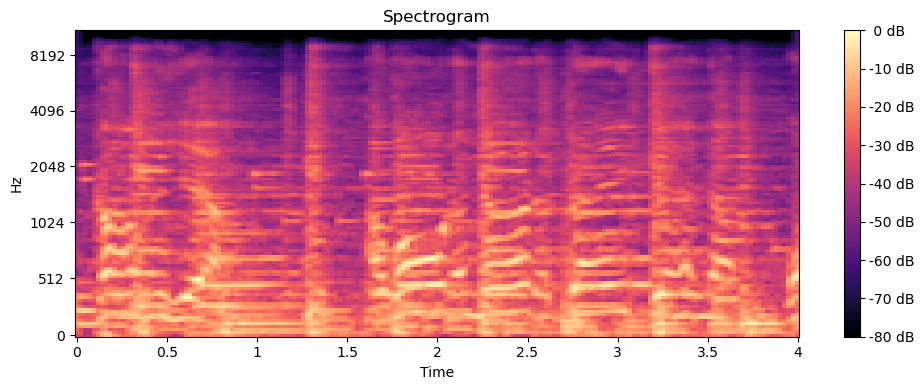

(128, 173)


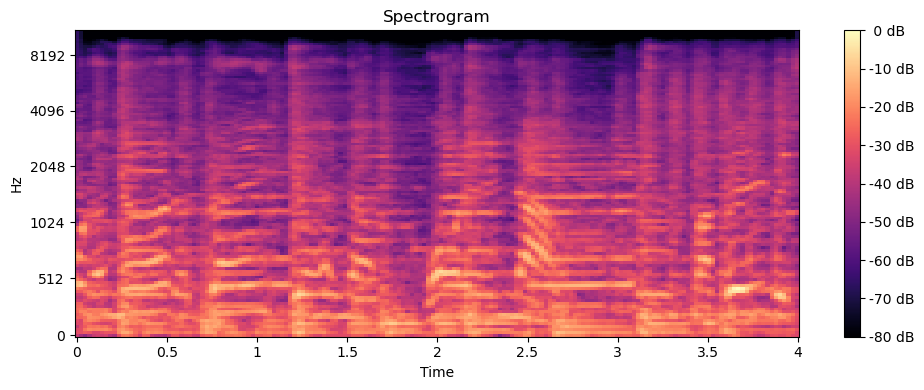

(128, 173)


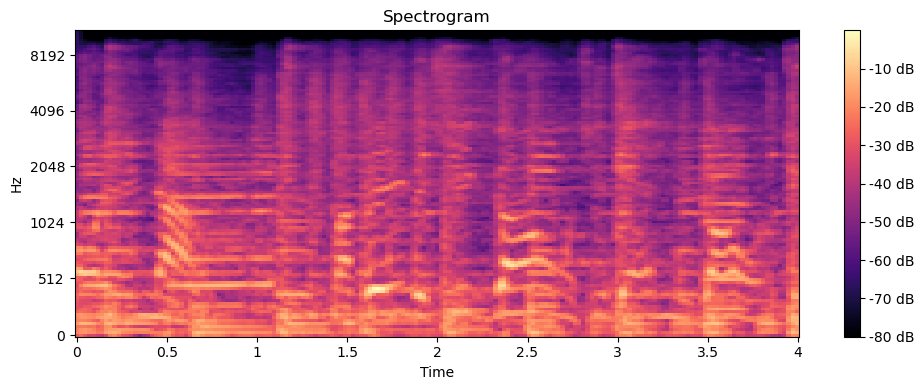

(128, 173)


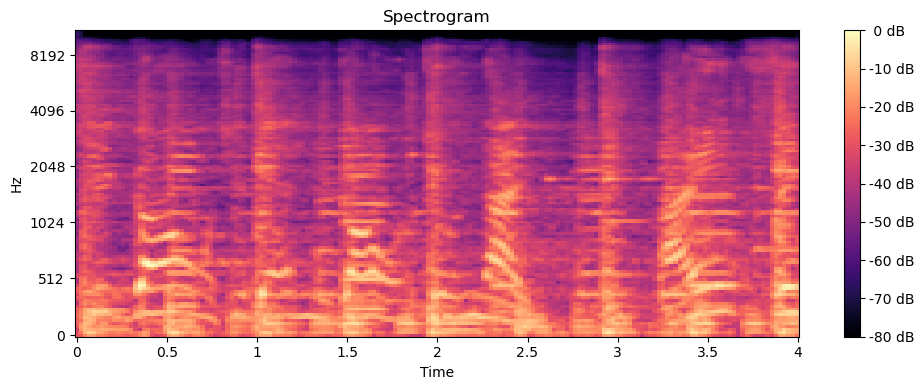

(128, 173)


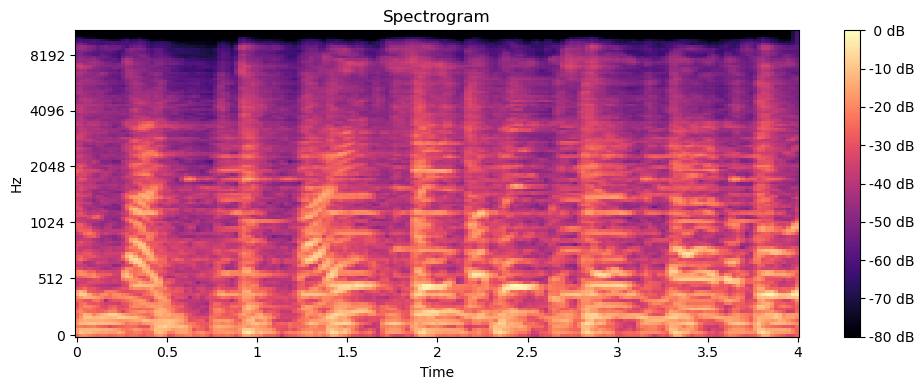

(128, 173)


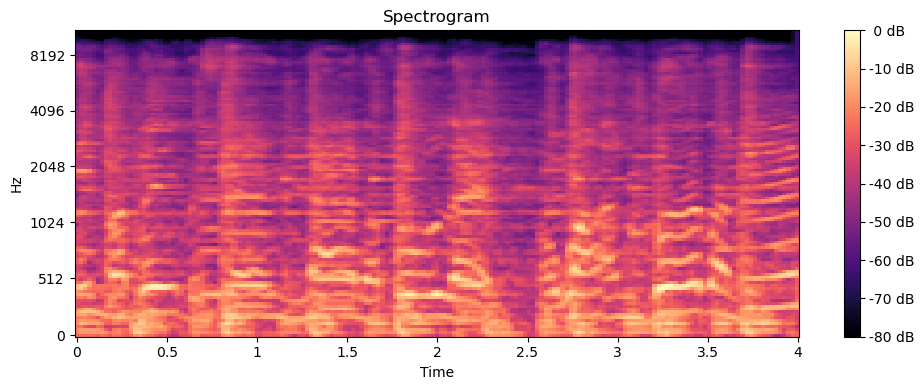

(128, 173)


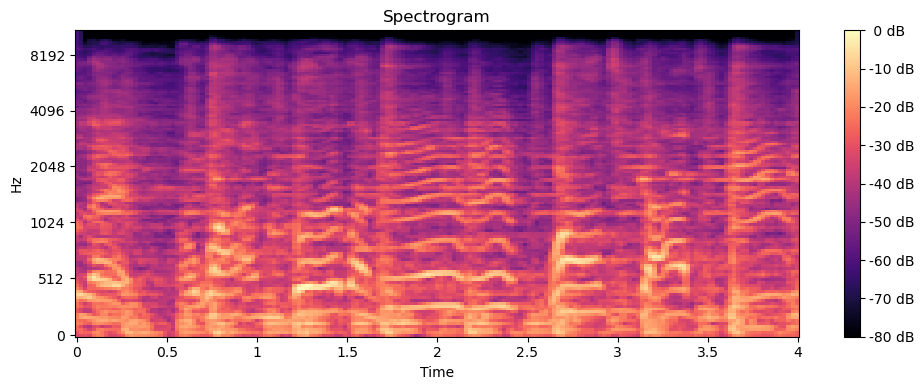

(128, 173)


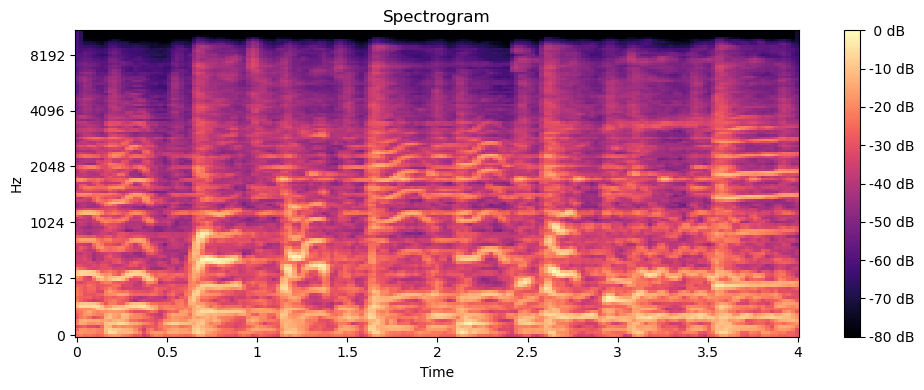

(128, 173)


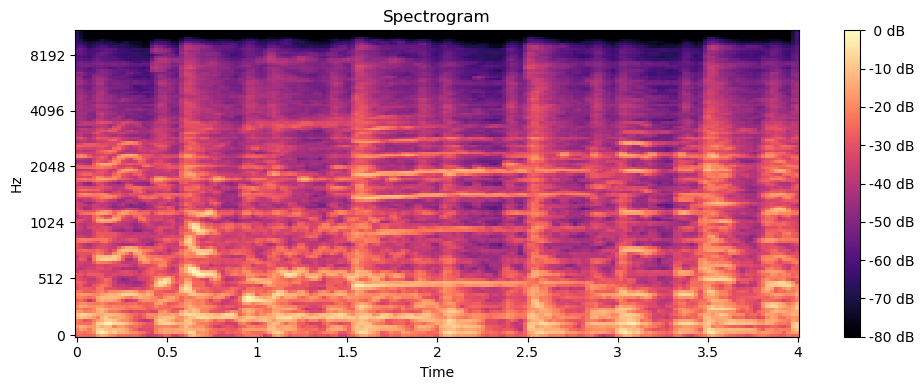

(128, 87)


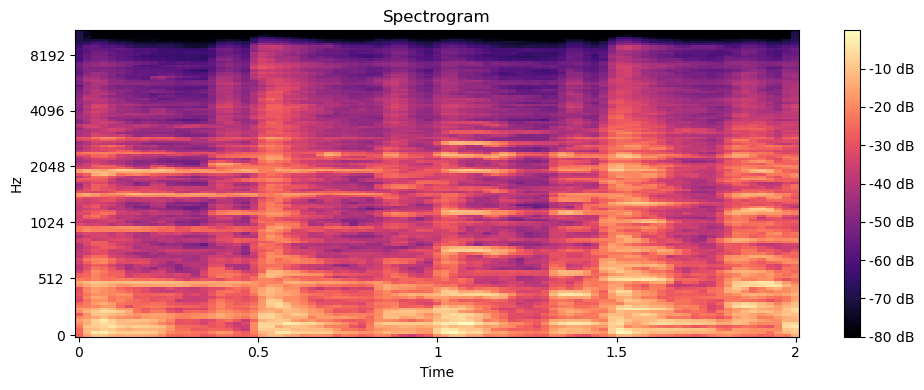

In [10]:
audio_path = "./genres_original-20250610T204939Z-1-001/genres_original/blues/blues.00000.wav"
y,sr = librosa.load(audio_path,sr=None)
melspectrogramchunksplotter(y,sr)

In [73]:
128*173

22144

In [82]:
148*148

21904

In [44]:

data_dir = "./genres_original-20250610T204939Z-1-001/genres_original"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
def preprocessdata(data_dir,classes,target_shape=(148,148)):
    data = []
    labels = []
    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_dir,file_name)
                audio_data,sample_rate = librosa.load(file_path,sr = None)
                chunk_duration = 4 
                overlap_duration = 2 
                chunk_samples = chunk_duration*sample_rate
                overlap_samples = overlap_duration*sample_rate
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples))) + 1
                for i in range(num_chunks):
                    start = i*(chunk_samples-overlap_samples)
                    end = start + chunk_samples
                    chunk = audio_data[start:end]
                    spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    spectrogram = resize(np.expand_dims(spectrogram,axis=-1),target_shape)
                    data.append(spectrogram)
                    labels.append(i_class)

    return np.array(data),np.array(labels)
                                

In [12]:
data,labels = preprocessdata(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [13]:
data.shape

(14975, 148, 148, 1)

In [14]:
labels.shape

(14975,)

In [15]:
labels = to_categorical(labels,num_classes=len(classes))
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
labels.shape

(14975, 10)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [19]:
x_train[0].shape

(148, 148, 1)

In [107]:
model = tf.keras.models.Sequential()

In [108]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=x_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\rizzh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [110]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [111]:
model.add(Dropout(0.3))

In [112]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [113]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [114]:
model.add(Dropout(0.3))

In [115]:
model.add(Flatten())

In [116]:
model.add(Dense(units=1200,activation='relu'))

In [117]:
model.add(Dropout(0.45))

In [118]:
model.add(Dense(units=len(classes),activation='softmax'))

In [119]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 73, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 35, 35, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 33, 33, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [121]:
training_history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 310s 813ms/step - accuracy: 0.2006 - loss: 2.1347 - val_accuracy: 0.4170 - val_loss: 1.5991
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4506s 12s/step - accuracy: 0.4723 - loss: 1.4882 - val_accuracy: 0.5810 - val_loss: 1.2130
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 316s 841ms/step - accuracy: 0.5968 - loss: 1.1657 - val_accuracy: 0.6624 - val_loss: 0.9818
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 311s 830ms/step - accuracy: 0.6581 - loss: 0.9993 - val_accuracy: 0.7109 - val_loss: 0.8463
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 307s 819ms/step - accuracy: 0.7218 - loss: 0.8160 - val_accuracy: 0.7462 - val_loss: 0.7483
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 284s 757ms/step - accuracy: 0.7514 - loss: 0.7253 - val_accuracy: 0.7683 - val_loss: 0.6935
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 273s 726ms/step - accuracy: 0.7896 - loss: 0.6237 - val_accuracy: 0.7609 - val_loss: 0.6908
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 294s 784ms/step - accuracy: 0.8237 - 

In [124]:
model.save('model.keras')
import json
with open('history.json', 'w') as f:
    json.dump(training_history.history, f)

In [20]:
model = tf.keras.models.load_model('model.keras')

C:\Users\rizzh\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [21]:
import json
with open('history.json', 'r') as f:
    training_history = json.load(f)


In [22]:
train_loss,training_accuracy = model.evaluate(x_train,y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 222s 588ms/step - accuracy: 0.9814 - loss: 0.0540


In [23]:
val_loss,val_accuracy = model.evaluate(x_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 55s 584ms/step - accuracy: 0.8826 - loss: 0.5087


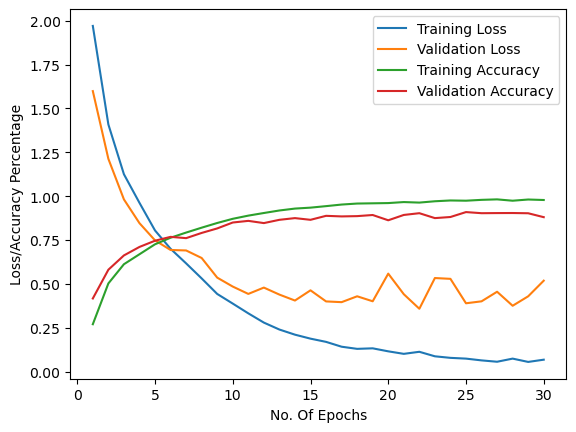

In [26]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history['loss'] , label = "Training Loss")
plt.plot(epochs,training_history['val_loss'] , label = "Validation Loss")
plt.plot(epochs,training_history['accuracy'] , label = "Training Accuracy")
plt.plot(epochs,training_history['val_accuracy'] , label = "Validation Accuracy")
plt.xlabel("No. Of Epochs")
plt.ylabel("Loss/Accuracy Percentage")
plt.legend()
plt.show()

In [30]:
y_predict = model.predict(x_test)
y_predict.shape

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step


(2995, 10)

In [31]:
y_predict

array([[4.2960441e-04, 1.0937557e-04, 1.3099684e-03, ..., 9.8103219e-01,
        9.4041851e-04, 6.6605612e-04],
       [3.3974376e-17, 4.6918468e-22, 7.4166966e-17, ..., 6.0468563e-21,
        1.2348528e-17, 1.1465514e-08],
       [5.1990573e-12, 2.3799555e-13, 7.4777552e-11, ..., 8.4639049e-12,
        1.5065584e-12, 6.2725483e-04],
       ...,
       [9.6767241e-01, 1.8452534e-13, 5.0785318e-05, ..., 4.3585360e-10,
        6.2759652e-11, 6.0795873e-07],
       [1.9982767e-03, 7.6838940e-01, 7.8315269e-03, ..., 4.7845454e-03,
        3.1170517e-03, 4.3451716e-03],
       [8.8735338e-04, 1.0925641e-05, 6.4003479e-04, ..., 2.7483054e-03,
        5.9405476e-04, 1.3526599e-01]], dtype=float32)

In [29]:
predicted_categories = np.argmax(y_predict , axis = 1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [33]:
true_categories = np.argmax(y_test,axis = 1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [39]:
cm = confusion_matrix(true_categories,predicted_categories)
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.97      0.74      0.84       302
   classical       0.96      0.93      0.94       298
     country       0.72      0.86      0.78       317
       disco       0.90      0.92      0.91       312
      hiphop       0.94      0.92      0.93       277
        jazz       0.95      0.90      0.92       311
       metal       0.89      0.98      0.93       302
         pop       0.86      0.92      0.89       289
      reggae       0.98      0.83      0.90       296
        rock       0.74      0.82      0.78       291

    accuracy                           0.88      2995
   macro avg       0.89      0.88      0.88      2995
weighted avg       0.89      0.88      0.88      2995



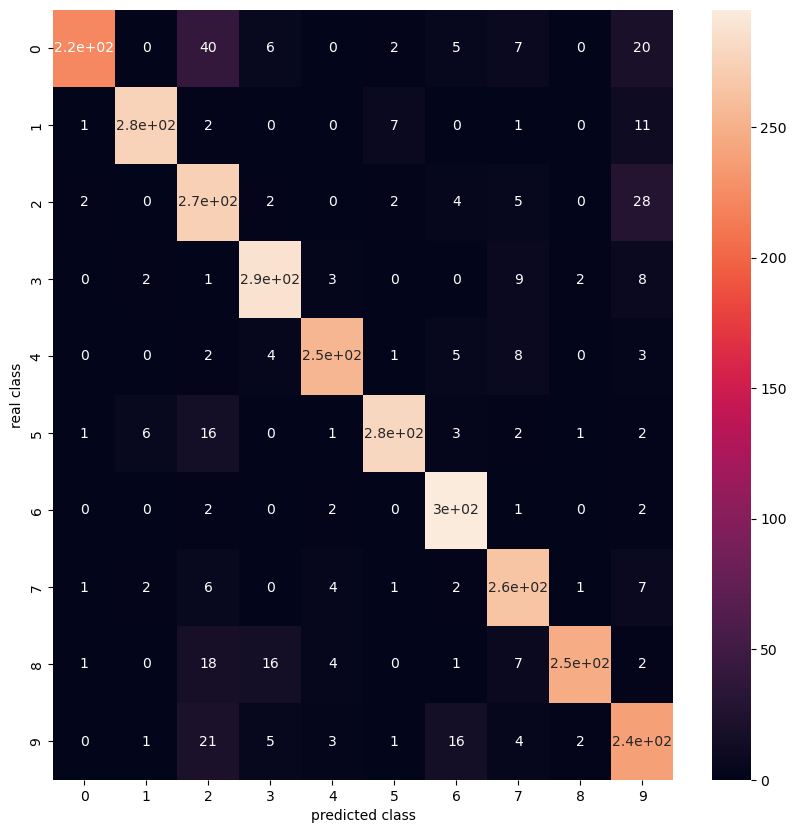

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("predicted class")
plt.ylabel("real class")
plt.show()